# Playground: Regression with One Explanatory Variable

Data
  - regularization
  - catching irregularities
  - noise in the data  
  
Building
  - layers
  - nodes
  - activation functions  
  
Compiling
  - learning rate
  - loss functions  
  
Training
  - epochs
  - batch size
  - overfitting
  - ? dropout
  - ? early stop  
  
Testing
  - ? validation split, validation loss  

In [1]:
%matplotlib inline
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

Using TensorFlow backend.


### Generate Dummy Data

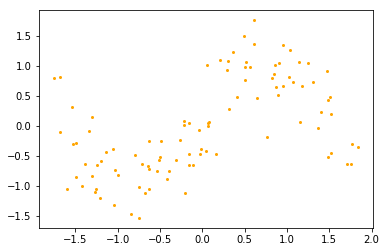

In [7]:
# generate some fake input_data (n data points in range 1 to n with uniform distribution)
n = 100
input_data = np.array(range(100)) + np.random.normal(loc=0, scale=3, size=n)

# normalize the input_data by transforming each value to its respective zscore
# neural networks work much better with normalized values
norm_data = zscore(input_data.transpose())

# Choose the function for the underlying pattern of your data
linear = norm_data
parabolic = norm_data**2
sin = np.sin(2*norm_data)
discontinuous = np.array([0 if i > -1  and i < 1 else i*-4 for i in norm_data])

# Set targets to one of the previously defined functions or define your own
targets = sin

# Add some noise (as all data has). Pick noise between 0-1
noise = .5
targets = targets.transpose() + np.random.normal(loc=0.0, scale=noise, size=n)

# Reshape your data to feed into the model
norm_data = np.array([[i] for i in norm_data])
targets = np.array([[i] for i in targets])

# Plot the data
plt.plot(norm_data, targets, 'ro', markersize=2, color="orange")

### Return a Built and Compiled Model

In [3]:
# Return a built and compiled model
# n_cols: number of explanatory features you're planning to feed into the model
# inside this function, you can adjust the number of layers, 
# ... nodes per layer, activation functions, optimizer type,
def get_regression_model(n_cols):
    # Set up a sequential (feed-forward) model
    model = Sequential()

    # Add a hidden layer. First layer must declare input shape being the number of features you're feeding into it
    model.add(Dense(8, activation='tanh', input_shape=(n_cols,)))

    # Add a hidden layer. Try different activation functions. Try different number of nodes.
    model.add(Dense(4, activation='elu'))

    # Add the output layer. Only 1 node for regression models. No activation function.
    model.add(Dense(1))

    # Use the SGD optimizer and mean_squared_error loss function
    # ... try other optimizers like "adam" by setting optimizer="adam"
    # ... try other loss functions (https://keras.io/losses/)
    SGD = keras.optimizers.sgd(lr=.03)
    model.compile(optimizer=SGD, loss='mse', metrics=["mse"])

    # return the model built and compiled
    return model

### Build the Keras Neural Network Model

### Fit the model

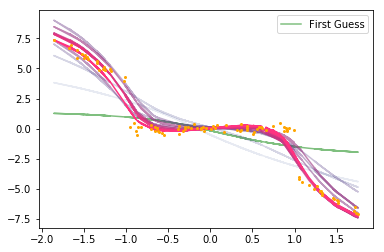

In [4]:
# get a new regression model: model
model = get_regression_model(1)

# start a lof of the mean squared error: log
log = {"mse":[], }

# set the number of rounds to train (each round will be multiple epochs)
training_iterations = 10

# fit your model once to see what the model guesses (in green) after one try through your data
history = model.fit(norm_data, targets, epochs=1, verbose=0)
log["mse"].extend(history.history['mean_squared_error'])
predictions = model.predict(norm_data)
plt.plot(norm_data, predictions, alpha=.5, color="green")
plt.legend(['First Guess'], loc='best')


# then run through your data 'training_iterations' more times
for i in range(training_iterations):
    # at each iteration, record the history of how your models performance
    history = model.fit(norm_data, targets, epochs=5, batch_size=10, verbose=0)
    
    # save that history to a log for later use
    log["mse"].extend(history.history['mean_squared_error'])
    
    # have the model make predictions off of your normalized input data
    predictions = model.predict(norm_data)
    
    # alpha is just a coefficient between 0-1 that will be used to set the color and opacity of the plot
    alpha = (i+1)/training_iterations
    
    # add a plot to the figure of what your machine guessed for your input data after this iteration
    # "earlier" guesses will be more faded while "later" guesses will be more vivid
    plt.plot(norm_data, predictions, alpha=alpha, color=(alpha, 0.2, 0.5))

# add the plot of the initial input data to the figure
plt.plot(norm_data, targets, 'ro', markersize=2, color="orange")
# show the figure
plt.show()

### Access Model Performance

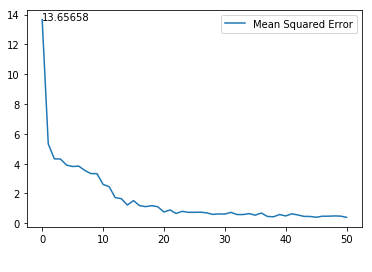

In [8]:
# now access how your model did on the training data after each iteration by graphing the 'Mean Squared Error'
first_loss = round(log["mse"][0], 5)
final_loss = round(log["mse"][-1], 5)
plt.plot(log["mse"])
plt.annotate(first_loss,(0,log["mse"][0]))
plt.annotate(final_loss,(n,log["mse"][-1]))
plt.legend(['Mean Squared Error'], loc='best')
plt.show()

Head over to [Tensorflow Playgound](http://playground.tensorflow.org)!